# Libraries

In [1]:
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import absolute
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score

# Data

In [2]:
weekly_DM=pd.read_csv("../../weekly_DM.csv")
weekly_DM.set_index(["DATE"],inplace=True)

# Models

In [3]:
kf = KFold(n_splits=5)

# Logistic Regression

In [4]:
y=weekly_DM.pop("Drought_Level")
x=weekly_DM[["AWND","PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

In [5]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.25,shuffle=False)

In [6]:
train_X_norm=preprocessing.normalize(train_X)
test_X_norm1=preprocessing.normalize(test_X)

In [7]:
M1_Score = cross_val_score(LogisticRegression(), train_X_norm, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M1_Score}')
print(mean(absolute(M1_Score)))

Scores for each fold are: [0.42777778 0.49444444 0.61666667 0.47222222 0.7150838 ]
0.5452389819987585


In [8]:
M1= LogisticRegression()
M1.fit(train_X_norm,train_Y)

LogisticRegression()

In [9]:
M1_prediction=M1.predict(test_X_norm1)

In [10]:
ACC_1=accuracy_score(test_Y,M1_prediction)
print("Accuracy Score: %.2f" % ACC_1)
PCS_1=precision_score(test_Y,M1_prediction)
print("Precision Score: %.2f" % PCS_1)
RCL_1=recall_score(test_Y,M1_prediction)
print("Recall Score: %.2f" % RCL_1)

Accuracy Score: 0.70
Precision Score: 0.50
Recall Score: 0.02


# k-Nearest Neighbors

In [11]:
x=weekly_DM[["AWND","PRCP","SNWD","TMAX","TMIN"]].copy()

In [12]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.25,shuffle=False)

In [13]:
train_X_norm=preprocessing.normalize(train_X)
test_X_norm2=preprocessing.normalize(test_X)

In [14]:
M2_Score = cross_val_score(KNeighborsClassifier(n_neighbors=17), train_X_norm, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M2_Score}')
print(mean(absolute(M2_Score)))

Scores for each fold are: [0.47222222 0.51111111 0.52222222 0.47222222 0.59776536]
0.5151086281812539


In [15]:
M2=KNeighborsClassifier(n_neighbors=17)
M2.fit(train_X_norm,train_Y)

KNeighborsClassifier(n_neighbors=17)

In [16]:
M2_prediction=M2.predict(test_X_norm2)

In [17]:
ACC_2=accuracy_score(test_Y,M2_prediction)
print("Accuracy Score: %.2f" % ACC_2)
PCS_2=precision_score(test_Y,M2_prediction)
print("Precision Score: %.2f" % PCS_2)
RCL_2=recall_score(test_Y,M2_prediction)
print("Recall Score: %.2f" % RCL_2)

Accuracy Score: 0.60
Precision Score: 0.33
Recall Score: 0.30


# Decision Trees

In [18]:
x=weekly_DM[["SNOW"]].copy()

In [19]:
train_X,test_X3,train_Y,test_Y=train_test_split(x,y,test_size=0.25,shuffle=False)

In [20]:
M3_score = cross_val_score(DecisionTreeClassifier(), train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M3_score}')
print(mean(absolute(M3_score)))

Scores for each fold are: [0.45       0.48888889 0.78333333 0.48888889 0.69832402]
0.581887026691496


In [21]:
M3=DecisionTreeClassifier()
M3.fit(train_X,train_Y)

DecisionTreeClassifier()

In [22]:
M3_prediction=M3.predict(test_X3)

In [23]:
ACC_3=accuracy_score(test_Y,M3_prediction)
print("Accuracy Score: %.2f" % ACC_3)
PCS_3=precision_score(test_Y,M3_prediction)
print("Precision Score: %.2f" % PCS_3)
RCL_3=recall_score(test_Y,M3_prediction)
print("Recall Score: %.2f" % RCL_3)

Accuracy Score: 0.66
Precision Score: 0.17
Recall Score: 0.03


# Random Forest

In [24]:
x=weekly_DM[["SNOW"]].copy()

In [25]:
train_X,test_X4,train_Y,test_Y=train_test_split(x,y,test_size=0.25,shuffle=False)

In [26]:
M4_score = cross_val_score(RandomForestClassifier(), train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M4_score}')
print(mean(absolute(M4_score)))

Scores for each fold are: [0.45555556 0.48888889 0.77777778 0.49444444 0.68156425]
0.5796461824953445


In [27]:
M4=RandomForestClassifier()
M4.fit(train_X,train_Y)

RandomForestClassifier()

In [28]:
M4_prediction=M4.predict(test_X4)

In [29]:
ACC_4=accuracy_score(test_Y,M4_prediction)
print("Accuracy Score: %.2f" % ACC_4)
PCS_4=precision_score(test_Y,M4_prediction)
print("Precision Score: %.2f" % PCS_4)
RCL_4=recall_score(test_Y,M4_prediction)
print("Recall Score: %.2f" % RCL_4)

Accuracy Score: 0.66
Precision Score: 0.28
Recall Score: 0.08


# XGBoost

In [30]:
x=weekly_DM[["SNWD"]].copy()

In [31]:
train_X,test_X5,train_Y,test_Y=train_test_split(x,y,test_size=0.25,shuffle=False)

In [32]:
M5_score = cross_val_score(XGBClassifier(), train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M5_score}')
print(mean(absolute(M5_score)))

Scores for each fold are: [0.43333333 0.46666667 0.74444444 0.47222222 0.68156425]
0.5596461824953445


In [33]:
M5=XGBClassifier()
M5.fit(train_X,train_Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
M5_prediction=M5.predict(test_X5)

In [35]:
ACC_5=accuracy_score(test_Y,M5_prediction)
print("Accuracy Score: %.2f" % ACC_5)
PCS_5=precision_score(test_Y,M5_prediction)
print("Precision Score: %.2f" % PCS_5)
RCL_5=recall_score(test_Y,M5_prediction)
print("Recall Score: %.2f" % RCL_5)

Accuracy Score: 0.68
Precision Score: 0.33
Recall Score: 0.04


# Model Evaluations

In [36]:
summary = pd.DataFrame({'Type':['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree','Random Forest','XGBoost'],
                   'Accuracy Score':[ACC_1, ACC_2, ACC_3, ACC_4, ACC_5],
                   'Precision Score':[PCS_1, PCS_2, PCS_3, PCS_4, PCS_5],
                   'Recall Score':[RCL_1, RCL_2, RCL_3, RCL_4, RCL_5]})
summary

,Type,Accuracy Score,Precision Score,Recall Score
0,Logistic Regression,0.696667,0.500000,0.021978
1,k-Nearest Neighbors,0.600000,0.325301,0.296703
2,Decision Tree,0.656667,0.166667,0.032967
3,Random Forest,0.660000,0.280000,0.076923
4,XGBoost,0.683333,0.333333,0.043956


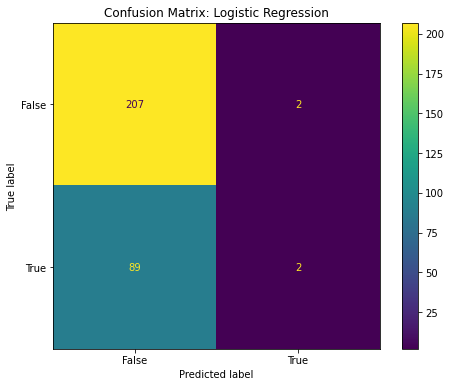

In [37]:
confusion_matrix = metrics.confusion_matrix(test_Y, M1_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
ax.set(title='Confusion Matrix: Logistic Regression')
cm_display.plot(ax=ax)
plt.show()

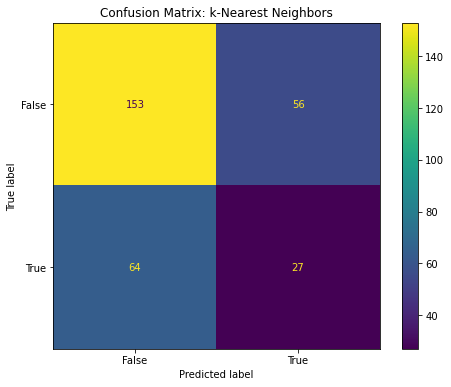

In [38]:
confusion_matrix = metrics.confusion_matrix(test_Y, M2_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
ax.set(title='Confusion Matrix: k-Nearest Neighbors')
cm_display.plot(ax=ax)
plt.show()

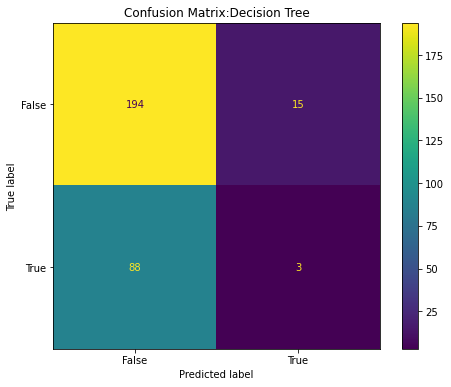

In [39]:
confusion_matrix = metrics.confusion_matrix(test_Y, M3_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
ax.set(title='Confusion Matrix:Decision Tree')
cm_display.plot(ax=ax)
plt.show()

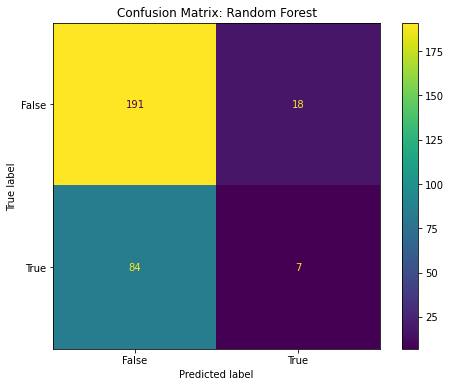

In [40]:
confusion_matrix = metrics.confusion_matrix(test_Y, M4_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
ax.set(title='Confusion Matrix: Random Forest')
cm_display.plot(ax=ax)
plt.show()

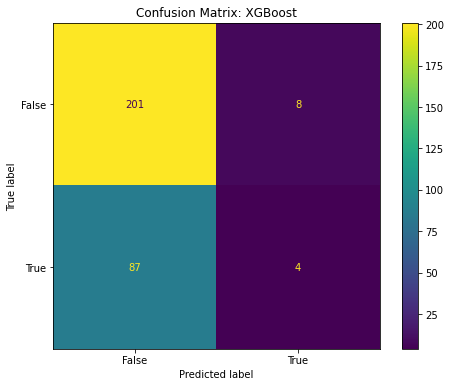

In [41]:
confusion_matrix = metrics.confusion_matrix(test_Y, M5_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
ax.set(title='Confusion Matrix: XGBoost')
cm_display.plot(ax=ax)
plt.show()

In [42]:
r_probs = [0 for _ in range(len(test_Y))]
M1_probs = M1.predict_proba(test_X_norm1)
M2_probs = M2.predict_proba(test_X_norm2)
M3_probs = M3.predict_proba(test_X3)
M4_probs = M4.predict_proba(test_X4)
M5_probs = M5.predict_proba(test_X5)

In [43]:
M1_probs = M1_probs[:, 1]
M2_probs = M2_probs[:, 1]
M3_probs = M3_probs[:, 1]
M4_probs = M4_probs[:, 1]
M5_probs = M5_probs[:, 1]

In [44]:
r_auc = roc_auc_score(test_Y, r_probs)
M1_auc = roc_auc_score(test_Y, M1_probs)
M2_auc = roc_auc_score(test_Y, M2_probs)
M3_auc = roc_auc_score(test_Y, M3_probs)
M4_auc = roc_auc_score(test_Y, M4_probs)
M5_auc = roc_auc_score(test_Y, M5_probs)

In [45]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression: AUROC = %.3f' % (M1_auc))
print('k-Nearest Neighbors: AUROC = %.3f' % (M2_auc))
print('Decision Tree: AUROC = %.3f' % (M3_auc))
print('Random Forest: AUROC = %.3f' % (M4_auc))
print('XGBoost: AUROC = %.3f' % (M5_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regression: AUROC = 0.547
k-Nearest Neighbors: AUROC = 0.542
Decision Tree: AUROC = 0.476
Random Forest: AUROC = 0.477
XGBoost: AUROC = 0.504


In [46]:
r_fpr, r_tpr, _ = roc_curve(test_Y, r_probs)
M1_fpr, M1_tpr, _ = roc_curve(test_Y, M1_probs)
M2_fpr, M2_tpr, _ = roc_curve(test_Y, M2_probs)
M3_fpr, M3_tpr, _ = roc_curve(test_Y, M3_probs)
M4_fpr, M4_tpr, _ = roc_curve(test_Y, M4_probs)
M5_fpr, M5_tpr, _ = roc_curve(test_Y, M5_probs)

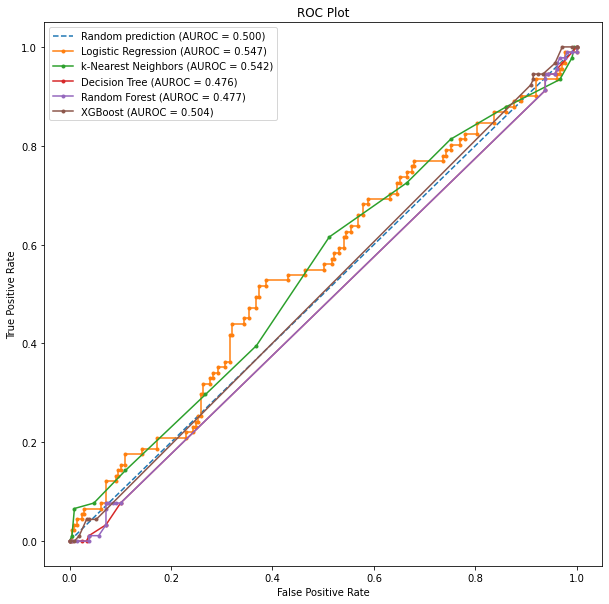

In [47]:
plt.figure(figsize=(10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(M1_fpr, M1_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % M1_auc)
plt.plot(M2_fpr, M2_tpr, marker='.', label='k-Nearest Neighbors (AUROC = %0.3f)' % M2_auc)
plt.plot(M3_fpr, M3_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % M3_auc)
plt.plot(M4_fpr, M4_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % M4_auc)
plt.plot(M5_fpr, M5_tpr, marker='.', label='XGBoost (AUROC = %0.3f)' % M5_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()